In [47]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入CART分类树模型对象
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# 导入红酒数据集
from sklearn.datasets import load_wine

# 导入数据集划分对象
from sklearn.model_selection import train_test_split

# 导入分类模型的评估指标accuracy_score
from sklearn.metrics import accuracy_score

# 导入graphviz工具依赖项
import graphviz

from IPython.core.interactiveshell import InteractiveShell # 这个对象设置所有行全部输出
  
# 设置该对象ast_node_interactivity的属性值为all，表示notebook下每一行有输出的代码全部输出运算结果
InteractiveShell.ast_node_interactivity = "all"

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.style.use('ggplot')



In [59]:
# 加载数据
dataset = load_wine()
x = dataset.data
y = dataset.target

pd.DataFrame(x, columns = dataset.feature_names)

pd.DataFrame(y).value_counts()

x.shape

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


1    71
0    59
2    48
Name: count, dtype: int64

(178, 13)

In [49]:
# 划分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=123)

In [91]:
# 构建CART分类器模型对象
clf = DecisionTreeClassifier(
  criterion = 'gini',
  random_state = 123,
  # splitter = 'beat'
)

# 完成模型训练
clf = clf.fit(Xtrain, Ytrain)

# 测试集预测结果
y_pred = clf.predict(Xtest)

# 使用accuracy_score评估预测的准确率
accuracy_score(y_pred, Ytest)


0.9444444444444444

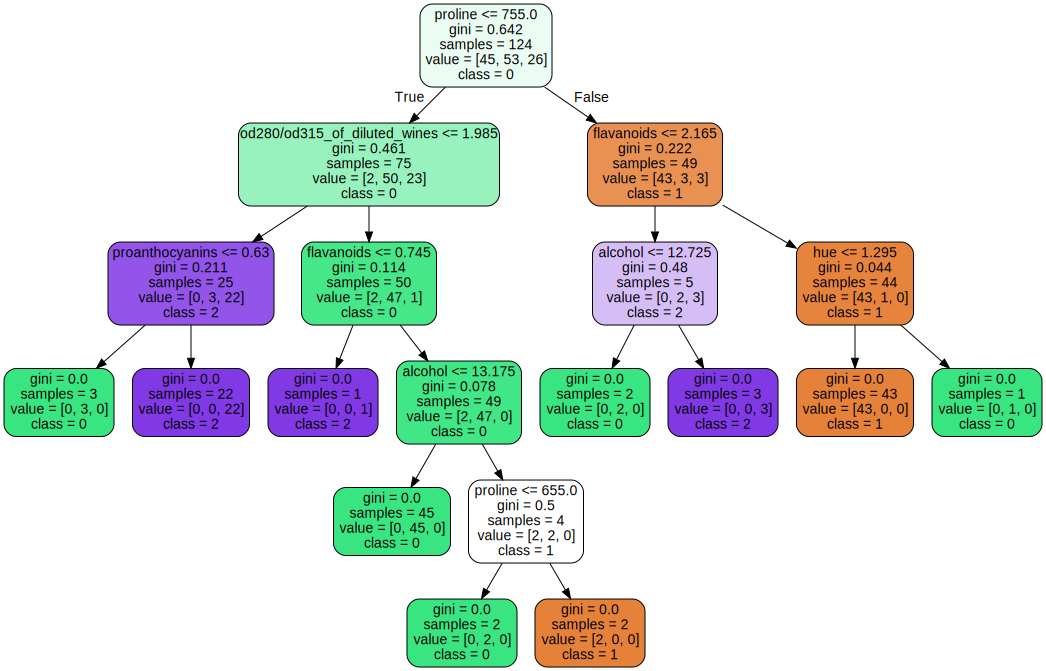

In [67]:
# 可视化当前决策树模型
dot_data = export_graphviz(
  clf,
  out_file=None,
  feature_names=dataset.feature_names,
  class_names=[str(i[0]) for i in list(pd.DataFrame(y).value_counts().index)],
  filled = True,
  rounded = True
)

# 可视化呈现
graph = graphviz.Source(dot_data)
graph


In [69]:
# 决策树对象相关的重要属性

# 1.显示各个特征的重要性
# clf.feature_importances_
[*zip(dataset.feature_names, clf.feature_importances_)]

[('alcohol', 0.023084847155971637),
 ('malic_acid', 0.03016420028380296),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.10591001422775764),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.06636124062436652),
 ('color_intensity', 0.025136833569835797),
 ('hue', 0.024565541897794068),
 ('od280/od315_of_diluted_wines', 0.29611189945266575),
 ('proline', 0.4286654227878057)]

In [73]:
# 返回经过决策树模型的训练，每一个训练样本决策树将其分到了哪一个叶子节点
clf.apply(Xtrain)

array([17, 10,  8,  8, 17, 17, 11, 17,  8, 17, 17, 17,  4, 17,  8, 17,  3,
        4, 17, 17, 17,  4,  8, 14,  3,  4, 17, 17,  8,  8,  8,  4,  4, 17,
       15,  4,  6,  4,  8, 17, 17,  8, 17,  8,  8,  8,  8, 17, 17, 17,  8,
        8, 17, 17,  4, 17,  4, 17, 17,  4,  8,  4, 11, 17, 10, 17,  4,  8,
        8, 17, 17,  8, 17,  8,  4, 14, 17, 17, 17,  8,  8,  8,  4,  4,  8,
       17,  8,  8,  8,  8,  8,  8,  8,  8,  4,  4,  4, 15, 17,  8, 17, 17,
       17,  3,  4,  8,  4,  4,  8, 17, 18, 17, 15,  8,  8, 17,  8,  8,  8,
       17,  8,  8,  8,  8], dtype=int64)

In [77]:
# 返回树节点的个数
clf.tree_.node_count

19

In [78]:
# 返回每个节点对应的特征索引值
clf.tree_.feature

array([12, 11,  8, -2, -2,  6, -2,  0, -2,  9, -2, -2,  6,  1, -2, -2, 10,
       -2, -2], dtype=int64)

In [82]:
# 查看当前决策树模型在训练集上的表现如何
clf.score(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

1.0

0.9629629629629629